# Project: Write a Data Science Blog Post
## Section one : Goals Understanding 
My Project is Egypt High School Grades and here are the Questions that i will answer : 
### Q1 : How many students are in each major?
### Q2 : What are the top 10 e students got heighest marks in Physics?
### Q3 : what is The status of the students ? 

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

## Section Two : Understanding The data

In [3]:
#import data
df = pd.read_csv('students_data.csv')

In [4]:
#to find numbers of rows and columns
df.shape

(109952, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109952 entries, 0 to 109951
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             109952 non-null  int64  
 1   SeatNumber             109952 non-null  int64  
 2   TotalGrades            109952 non-null  float64
 3   TotalPercentage        109952 non-null  object 
 4   Name                   109952 non-null  object 
 5   School                 109952 non-null  object 
 6   EducationZone          109952 non-null  object 
 7   Status                 109952 non-null  object 
 8   EductionType           109952 non-null  object 
 9   Department             109952 non-null  object 
 10  Arabic                 109952 non-null  object 
 11  FirstForeignLanguage   107432 non-null  object 
 12  SecondForeignLanguage  107432 non-null  object 
 13  DiscreteMath           19634 non-null   object 
 14  History                46614 non-nul

In [6]:
df.head(1)

,Unnamed: 0,SeatNumber,TotalGrades,TotalPercentage,Name,School,EducationZone,Status,EductionType,Department,...,Philosophy,ElmNafs,Chemistry,Biology,Giology,AppliedMath,Physics,Religion,Watnya,Statistics
0,0,1020534,179.0,43.66 %,شهد محمود ابو العلا عواد,الاورمان ث بنات,الدقى,راسب,طلاب,علمي علوم,...,NaN,NaN,16,30,25,NaN,30,إجتياز,إجتياز,إجتياز


## Section 3: Data prepration

In [7]:
#to see if there is any missing values
df.isna().sum()

Unnamed: 0                   0
SeatNumber                   0
TotalGrades                  0
TotalPercentage              0
Name                         0
School                       0
EducationZone                0
Status                       0
EductionType                 0
Department                   0
Arabic                       0
FirstForeignLanguage      2520
SecondForeignLanguage     2520
DiscreteMath             90318
History                  63338
Geography                63338
Philosophy               63338
ElmNafs                  63338
Chemistry                49134
Biology                  68768
Giology                  68768
AppliedMath              90318
Physics                  49134
Religion                     0
Watnya                       0
Statistics                2518
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

Unnamed: 0               0.0
SeatNumber               0.0
TotalGrades              0.0
TotalPercentage          0.0
Name                     0.0
School                   0.0
EducationZone            0.0
Status                   0.0
EductionType             0.0
Department               0.0
Arabic                   0.0
FirstForeignLanguage     0.0
SecondForeignLanguage    0.0
DiscreteMath             0.0
History                  0.0
Geography                0.0
Philosophy               0.0
ElmNafs                  0.0
Chemistry                0.0
Biology                  0.0
Giology                  0.0
AppliedMath              0.0
Physics                  0.0
Religion                 0.0
Watnya                   0.0
Statistics               0.0
dtype: float64

In [24]:
sum(df.duplicated())

0

In [25]:
df.describe()

,Unnamed: 0,SeatNumber,TotalGrades
count,109952.000000,1.099520e+05,109952.000000
mean,54975.500000,1.076049e+06,243.903935
std,31740.552736,3.992402e+04,68.598658
min,0.000000,1.010532e+06,0.000000
25%,27487.750000,1.042108e+06,206.500000
50%,54975.500000,1.072212e+06,245.000000
75%,82463.250000,1.115243e+06,288.000000
max,109951.000000,1.145533e+06,404.000000


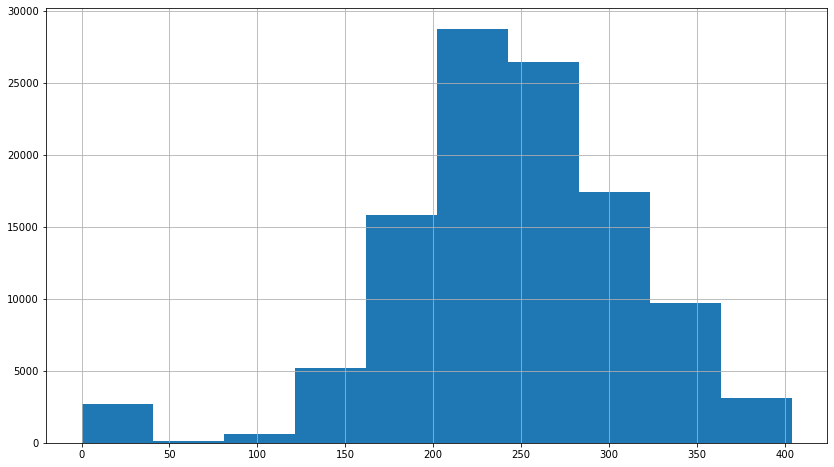

In [26]:
plt.figure(figsize=[14,8])
df['TotalGrades'].hist();

### Q1 : How many students are in each major?

In [27]:
df['Department'].value_counts()

أدبي          46613
علمي علوم     41184
علمي رياضة    19634
غير محدد       2521
Name: Department, dtype: int64

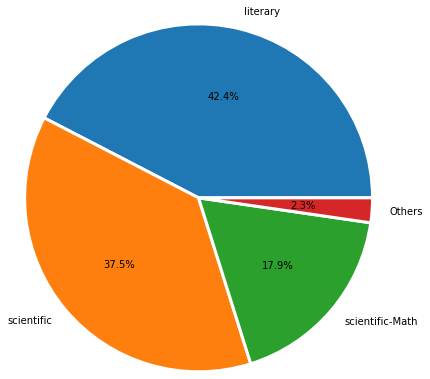

In [28]:
plt.pie(x=df['Department'].value_counts(),labels=['literary','scientific','scientific-Math','Others'],radius=2,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "white", 'linewidth': 3, 'antialiased': True});

From the figure we have, we conclude that the percentage of students in literary majors is the largest group in the school

### Q2 : What are the top 10 e students got heighest marks in Physics?

In [29]:
best = df[['TotalGrades', 'Name']].sort_values('TotalGrades', ascending=False)[:10]
best


,TotalGrades,Name
56625,404.0,عز الدين طارق عز الدين محمد مراد
60373,403.5,احمد محمد سعيد هاشم
62309,403.0,هند جمعه عبد الرازق عبد الحميد
60618,402.0,مصطفى عيد سيد عبد السلام
61988,402.0,احمد هاشم سرحان عبد العال
42890,402.0,خديجه حماد شعبان عبد الجواد
61818,401.5,مصطفى محمد احمد عبد العظيم
56612,401.0,باسل خالد بهى اسماعيل حسن
56635,401.0,محمد اشرف محمد محمد
56700,401.0,سيف جمال اسماعيل مصطفى


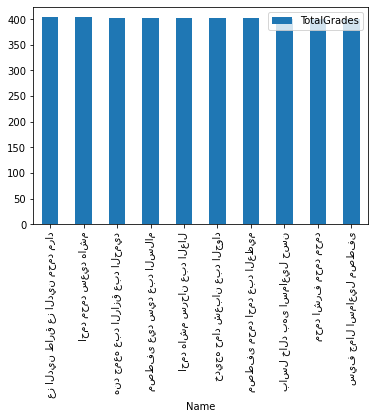

In [30]:
best.plot.bar(x='Name', y='TotalGrades');

From the figure that appears to us, we can conclude that there are many students who obtained the same degree or full degree in the subject


### Q3 : what is The status of the students ?


In [31]:
df['Status'].value_counts()

ناجح        66003
دور ثاني    29552
راسب        14397
Name: Status, dtype: int64

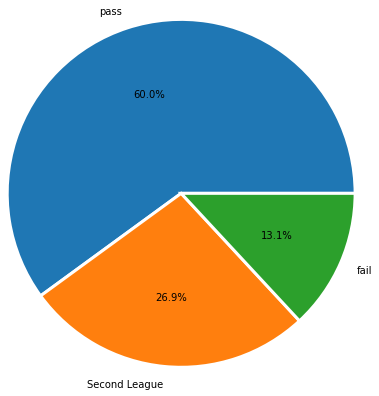

In [32]:
plt.pie(x=df['Status'].value_counts(),labels=['pass','Second League','fail'],radius=2,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "white", 'linewidth': 3, 'antialiased': True});

From the figure shown above, we can see the average status of all students, and we can conclude that the rate of successful students is very large

<AxesSubplot:>

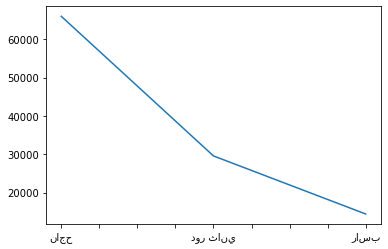

In [33]:
line = df['Status'].value_counts()
line.plot.line()

From the figure shown above, we can see the status indicator of all students, and we can conclude that the rate of students who fail is declining

### Evaluation

Students with Literary major they are the largest group in the school. so i decided to choose one subject form the Science major to see how the student doing and I found that they are doing well, also I found that the average of successful is too high. and my advice to the school to make there fox to Science major and give it more support.